In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Student Attitude and Behavior.csv")

In [3]:
data.head()

,Certification Course,Gender,Department,Height(CM),Weight(KG),10th Mark,12th Mark,college mark,hobbies,daily studing time,prefer to study in,salary expectation,Do you like your degree?,willingness to pursue a career based on their degree,social medai & video,Travelling Time,Stress Level,Financial Status,part-time job
0,No,Male,BCA,100.0,58.0,79.0,64.0,80.0,Video Games,0 - 30 minute,Morning,40000,No,50%,1.30 - 2 hour,30 - 60 minutes,Bad,Bad,No
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30 - 60 minute,Morning,15000,Yes,75%,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,No
2,Yes,Male,BCA,159.0,78.0,71.0,61.0,55.0,Cinema,1 - 2 Hour,Anytime,13000,Yes,50%,More than 2 hour,30 - 60 minutes,Awful,Bad,No
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,1 - 2 Hour,Anytime,1500000,No,50%,1.30 - 2 hour,0 - 30 minutes,Bad,good,No
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,30 - 60 minute,Morning,50000,Yes,25%,1.30 - 2 hour,30 - 60 minutes,Good,good,No


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 19 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Certification Course                                    235 non-null    object 
 1   Gender                                                  235 non-null    object 
 2   Department                                              235 non-null    object 
 3   Height(CM)                                              235 non-null    float64
 4   Weight(KG)                                              235 non-null    float64
 5   10th Mark                                               235 non-null    float64
 6   12th Mark                                               235 non-null    float64
 7   college mark                                            235 non-null    float64
 8   hobbies                                 

In [5]:
print(data.describe())

       Height(CM)  Weight(KG)   10th Mark   12th Mark  college mark  \
count  235.000000  235.000000  235.000000  235.000000    235.000000   
mean   157.402128   60.803830   76.848511   68.775872     70.660553   
std     21.510805   14.895844   13.047560   11.018192     15.727446   
min      4.500000   20.000000    7.400000   45.000000      1.000000   
25%    152.000000   50.000000   70.000000   60.000000     60.000000   
50%    160.000000   60.000000   80.000000   69.000000     70.000000   
75%    170.000000   70.000000   86.250000   76.000000     80.000000   
max    192.000000  106.000000   98.000000   94.000000    100.000000   

       salary expectation  
count        2.350000e+02  
mean         3.248168e+04  
std          1.113146e+05  
min          0.000000e+00  
25%          1.500000e+04  
50%          2.000000e+04  
75%          2.500000e+04  
max          1.500000e+06  


In [6]:
# Stress Level 값 분포 확인
print(data['Stress Level '].value_counts())

Stress Level 
Good        137
Bad          68
Awful        19
fabulous     11
Name: count, dtype: int64


In [7]:
# Stress Level을 수치형으로 매핑
stress_mapping = {'Good': 1, 'fabulous': 2, 'Bad': 3, 'Awful': 4}
data['Stress Level '] = data['Stress Level '].map(stress_mapping)

print(data['Stress Level '].value_counts())

Stress Level 
1    137
3     68
4     19
2     11
Name: count, dtype: int64


In [8]:
plt.rcParams['font.family'] = 'NanumGothic' 

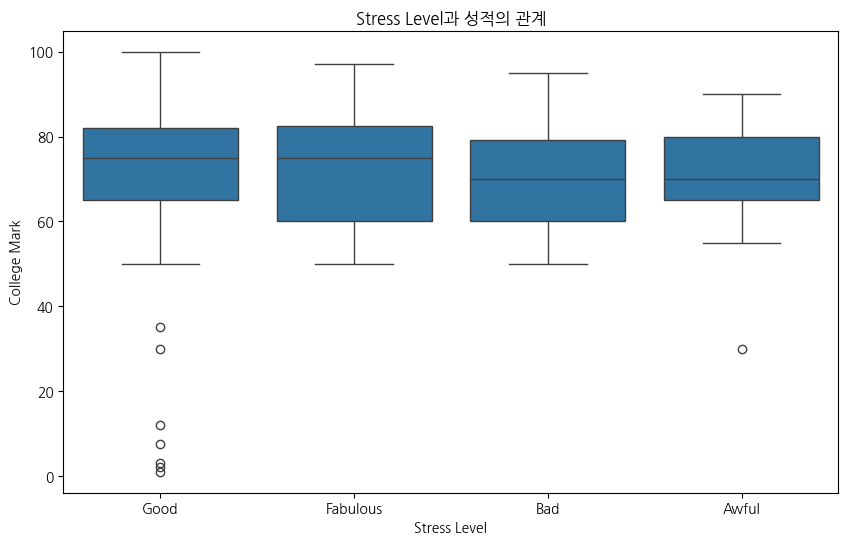

In [9]:
# Stress Level과 college mark의 관계
plt.figure(figsize=(10, 6))
sns.boxplot(x='Stress Level ', y='college mark', data=data)
plt.title('Stress Level과 성적의 관계')
plt.xlabel('Stress Level')
plt.ylabel('College Mark')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Good', 'Fabulous', 'Bad', 'Awful'])
plt.show()

In [35]:
from scipy.stats import shapiro

# 시험 성적 정규성 검정
stat_college, p_college = shapiro(data['college mark'])
print(f"시험 성적 정규성 검정: {stat_college:.3f}, p-value = {p_college}") # 정규성을 따르지 않는다.

# 스트레스 레벨 정규성 검정
stat_stress, p_stress = shapiro(data['Stress Level '])
print(f"스트레스 레벨 정규성 검정: {stat_stress:.3f}, p-value = {p_stress}") # 정규성을 따르지 않는다.

시험 성적 정규성 검정: 0.879, p-value = 1.0397587738714131e-12
스트레스 레벨 정규성 검정: 0.715, p-value = 8.738398675790979e-20


In [36]:
from scipy.stats import levene

# 스트레스 레벨 별 그룹
stress_groups = data.groupby('Stress Level ')['college mark'].apply(list)

# 등분산성 검정
stat_levene, p_levene = levene(*stress_groups)
print(f"등분산성 검정: {stat_levene:.3f}, p-value = {p_levene}") # 등분산성을 만족한다.

등분산성 검정: 0.920, p-value = 0.43190771637438174


In [41]:
from scipy.stats import kruskal

stress_groups = data.groupby('Stress Level ')['college mark'].apply(list)

stat_kruskal, p_kruskal = kruskal(*stress_groups)

print(f"Kruskal-Wallis 검정 통계량: {stat_kruskal:.3f}, p-value = {p_kruskal:.3f}")

if p_kruskal < 0.05:
    print("p-value가 0.05보다 작으므로, 스트레스 레벨 그룹 간 성적에 유의미한 차이가 있습니다.")
else:
    print("p-value가 0.05보다 크므로, 스트레스 레벨 그룹 간 성적에 유의미한 차이가 없습니다.")

Kruskal-Wallis 검정 통계량: 7.114, p-value = 0.068
p-value가 0.05보다 크므로, 스트레스 레벨 그룹 간 성적에 유의미한 차이가 없습니다.
